# <center>Breast Cancer Prediction</center>
<center>Dataset source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data</center>
<br>
<center>The data consists of features computed from breast mass images and the corresponding diagnosis:<br>Malignant (M) or Benign (B)</center>
<br>
<center>We will use Artificial Neural Network for this binary classification</center>

## 1. Import libraries and functions

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, classification_report

## 2. Read and format the dataset

In [2]:
data = pd.read_csv('data.csv')
print('#Rows:',data.shape[0],' #Columns:',data.shape[1])
data.head(3)

#Rows: 569  #Columns: 32


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
data["cancer"] = (data["diagnosis"]=='M').astype(int)

In [4]:
data.drop(['id','diagnosis'], axis=1, inplace=True)

In [5]:
data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


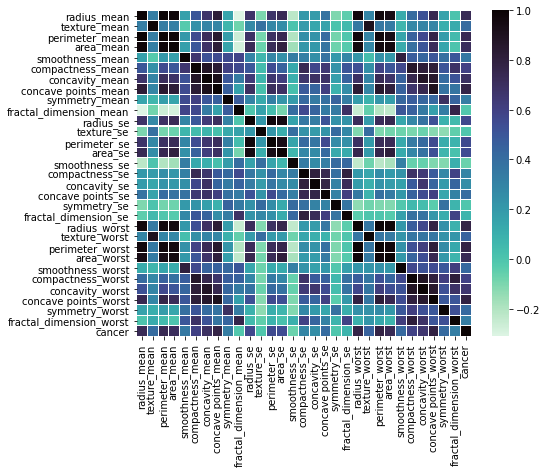

In [6]:
plt.figure(figsize=(7.5,6))
sns.heatmap(data.corr(), cmap="mako_r", linewidths=0.01);

In [7]:
print("Features with highest correlation with cancer:")
data.corr()["cancer"].sort_values(ascending=False)[1:6]

Features with highest correlation with cancer:


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: cancer, dtype: float64

In [8]:
data.describe().head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918


## 3. Train-test Split

In [9]:
X = data.drop(["cancer"], axis=1)
y = data["cancer"]

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Simple Artificial Neural Network with 2 hidden layers

In [13]:
simple_model = Sequential()
simple_model.add(Dense(30, activation='relu'))
simple_model.add(Dense(15, activation='relu'))
simple_model.add(Dense(1, activation='sigmoid'))
simple_model.compile(loss='binary_crossentropy', optimizer='adam')

In [14]:
simple_model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
13/13 [==============================] - 1s 12ms/step - loss: 0.7326 - val_loss: 0.7026
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6858 - val_loss: 0.6607
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6476 - val_loss: 0.6221
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6122 - val_loss: 0.5835
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5776 - val_loss: 0.5432
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5373 - val_loss: 0.5009
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4973 - val_loss: 0.4576
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4569 - val_loss: 0.4148
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4213 - val_loss: 0.3769
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3825 - val_loss: 0.3414
Epoch 11

13/13 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0528
Epoch 84/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0545 - val_loss: 0.0526
Epoch 85/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0549
Epoch 86/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0517
Epoch 87/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0547 - val_loss: 0.0538
Epoch 88/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0503
Epoch 89/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0530 - val_loss: 0.0518
Epoch 90/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0534
Epoch 91/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0530
Epoch 92/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0498
Epoch 93/600


13/13 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.0519
Epoch 165/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0296 - val_loss: 0.0486
Epoch 166/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.0506
Epoch 167/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0297 - val_loss: 0.0493
Epoch 168/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.0506
Epoch 169/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.0481
Epoch 170/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0289 - val_loss: 0.0490
Epoch 171/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0276 - val_loss: 0.0494
Epoch 172/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0276 - val_loss: 0.0508
Epoch 173/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.0503
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0637
Epoch 246/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.0608
Epoch 247/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0663
Epoch 248/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.0658
Epoch 249/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0651
Epoch 250/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0665
Epoch 251/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0236 - val_loss: 0.0646
Epoch 252/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.0682
Epoch 253/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0740
Epoch 254/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0664
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.0880
Epoch 327/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.0897
Epoch 328/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.0958
Epoch 329/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0870
Epoch 330/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.1008
Epoch 331/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.0868
Epoch 332/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0961
Epoch 333/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0077 - val_loss: 0.0872
Epoch 334/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0883
Epoch 335/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.0957
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.1150
Epoch 408/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.1222
Epoch 409/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.1208
Epoch 410/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.1304
Epoch 411/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.1127
Epoch 412/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.1423
Epoch 413/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.1190
Epoch 414/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.1342
Epoch 415/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.1236
Epoch 416/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.1319
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.1411
Epoch 489/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.1366
Epoch 490/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.1680
Epoch 491/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.1358
Epoch 492/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.1655
Epoch 493/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.1416
Epoch 494/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.1509
Epoch 495/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.1418
Epoch 496/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.1508
Epoch 497/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.1499
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.1750
Epoch 570/600
13/13 [==============================] - 0s 2ms/step - loss: 9.8984e-04 - val_loss: 0.1761
Epoch 571/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.1706
Epoch 572/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.1707
Epoch 573/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.1688
Epoch 574/600
13/13 [==============================] - 0s 3ms/step - loss: 8.7795e-04 - val_loss: 0.1789
Epoch 575/600
13/13 [==============================] - 0s 2ms/step - loss: 9.2669e-04 - val_loss: 0.1739
Epoch 576/600
13/13 [==============================] - 0s 3ms/step - loss: 9.9137e-04 - val_loss: 0.1756
Epoch 577/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.1687
Epoch 578/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_l

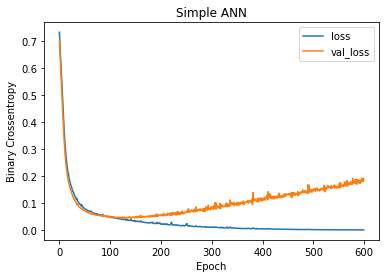

In [15]:
losses = pd.DataFrame(simple_model.history.history)
losses.plot()
plt.title('Simple ANN')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy');

## 5. ANN with early stopping

In [16]:
from keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [18]:
estop_model = Sequential()
estop_model.add(Dense(30, activation='relu'))
estop_model.add(Dense(15, activation='relu'))
estop_model.add(Dense(1, activation='sigmoid'))
estop_model.compile(loss='binary_crossentropy', optimizer='adam')
estop_model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6767 - val_loss: 0.6510
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6440 - val_loss: 0.6199
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6138 - val_loss: 0.5871
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5813 - val_loss: 0.5488
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5450 - val_loss: 0.5075
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5044 - val_loss: 0.4618
Epoch 7/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4610 - val_loss: 0.4144
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4169 - val_loss: 0.3695
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3749 - val_loss: 0.3289
Epoch 10/600
13/13 [==============================] - 0s 2ms/step - loss: 0.3379 - val_loss: 0.2921
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.0529 - val_loss: 0.0473
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0536 - val_loss: 0.0470
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0547 - val_loss: 0.0474
Epoch 86/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.0460
Epoch 87/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0465
Epoch 88/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0499 - val_loss: 0.0448
Epoch 89/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0463
Epoch 90/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0500 - val_loss: 0.0454
Epoch 91/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0507 - val_loss: 0.0465
Epoch 92/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.0451
Epoch 93/600


13/13 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.0443
Epoch 165/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.0465
Epoch 166/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0291 - val_loss: 0.0449
Epoch 167/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.0465
Epoch 168/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.0463
Epoch 169/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0292 - val_loss: 0.0478
Epoch 169: early stopping


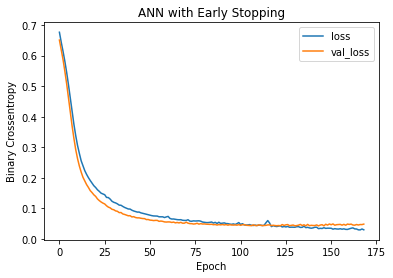

In [19]:
losses = pd.DataFrame(estop_model.history.history)
losses.plot()
plt.title('ANN with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy');

## 6. ANN with early stopping and dropout layers

In [20]:
from keras.layers import Dropout

In [21]:
final_model = Sequential()
final_model.add(Dense(30, activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(15, activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(loss='binary_crossentropy', optimizer='adam')
final_model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6969 - val_loss: 0.6673
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6819 - val_loss: 0.6504
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6634 - val_loss: 0.6380
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6551 - val_loss: 0.6201
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6421 - val_loss: 0.5996
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6266 - val_loss: 0.5732
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6008 - val_loss: 0.5486
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5914 - val_loss: 0.5283
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5805 - val_loss: 0.5067
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.4788
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.0571
Epoch 84/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.0552
Epoch 85/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1288 - val_loss: 0.0565
Epoch 86/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1348 - val_loss: 0.0554
Epoch 87/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1337 - val_loss: 0.0531
Epoch 88/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1407 - val_loss: 0.0537
Epoch 89/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.0569
Epoch 90/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1450 - val_loss: 0.0547
Epoch 91/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1121 - val_loss: 0.0542
Epoch 92/600
13/13 [==============================] - 0s 2ms/step - loss: 0.1211 - val_loss: 0.0536
Epoch 93/600


13/13 [==============================] - 0s 3ms/step - loss: 0.0697 - val_loss: 0.0420
Epoch 165/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0863 - val_loss: 0.0436
Epoch 166/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0741 - val_loss: 0.0428
Epoch 167/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0881 - val_loss: 0.0438
Epoch 168/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0684 - val_loss: 0.0433
Epoch 169/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0716 - val_loss: 0.0427
Epoch 170/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0979 - val_loss: 0.0447
Epoch 171/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0827 - val_loss: 0.0435
Epoch 172/600
13/13 [==============================] - 0s 2ms/step - loss: 0.0787 - val_loss: 0.0437
Epoch 173/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0796 - val_loss: 0.0420
Epoc

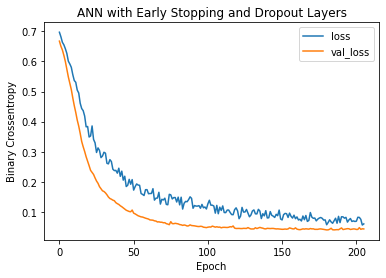

In [22]:
losses = pd.DataFrame(final_model.history.history)
losses.plot()
plt.title('ANN with Early Stopping and Dropout Layers')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy');

## Model predictions and Performance

In [23]:
train_pred = (final_model.predict(X_train) > 0.5).astype("int32")[:,0]
test_pred = (final_model.predict(X_test) > 0.5).astype("int32")[:,0]

6/6 [==============================] - 0s 1ms/step


### Training set accuracy

In [24]:
print("\n1) Accuracy:", round(accuracy_score(y_train, train_pred),4))
print("\n2) F1 Score:", round(f1_score(y_train, train_pred),4))
print("\n3) Confusion Matrix:\n")
print(confusion_matrix(y_train, train_pred))


1) Accuracy: 0.9925

2) F1 Score: 0.9898

3) Confusion Matrix:

[[249   0]
 [  3 146]]


### Testing set accuracy

In [25]:
print("\n1) Accuracy:", round(accuracy_score(y_test, test_pred),4))
print("\n2) F1 Score:", round(f1_score(y_test, test_pred),4))
print("\n3) Confusion Matrix:\n")
print(confusion_matrix(y_test, test_pred))


1) Accuracy: 0.9883

2) F1 Score: 0.9841

3) Confusion Matrix:

[[107   1]
 [  1  62]]
